In [198]:
""" Polynomial Regression
    Quadratic , cubic , exponensal , linear 
    Same algorithm as linear regression but change f(X)= wX+b into desired equation
    
    compute_cost
    compure_gradient
    gradient_descent
"""
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
import numpy as np
import matplotlib.pyplot as plt
import math,copy
np.set_printoptions(precision=2)



In [199]:
""" compute_cost at particular weight
    J(w,b) = 1/2m *sum of ( (wX+b)-y )**2 """
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        cost += err ** 2
    cost = cost / (2 * m)
    return cost

In [200]:
""" compute_gradient 
    dj_dw = 1/m * sum of ( (wX+b) - y ) * X[i]
    dj_db = 1/m * sum of ( (wX+b) - y )
"""
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dj_dw = np.zeros(X.shape[1])
    dj_db = 0 
    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        dj_dw += err * X[i]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [201]:
""" gradient_descent
repeat {
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    }
"""
def gradient_descent(X, y, w, b, alpha, num_of_iterations):
    w_final = copy.deepcopy(w)
    b_final = copy.deepcopy(b)
    hist = {"cost_hist": [],
            "w_hist": [],
            "b_hist": []}
    for i in range(num_of_iterations):
        d_dw, d_db = compute_gradient(X, y, w_final, b_final)
        w_final -= alpha * d_dw
        b_final -= alpha * d_db
        
        hist["cost_hist"].append(compute_cost(X, y, w_final, b_final))
        hist["w_hist"].append(copy.deepcopy(w_final))
        hist["b_hist"].append(b_final)
        
        if i % math.ceil(num_of_iterations / 10) == 0:
            print(f"at iteration {i} w = {w_final} b = {b_final} cost = {compute_cost(X, y, w_final, b_final)}")
    return w_final, b_final, hist
    

In [202]:
# Example usage:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
w = np.zeros(X.shape[1])  # Initial weights
b = 0  # Initial bias
alpha = 1e-2  # Learning rate
num_of_iterations = 1000  # Number of iterations

def z_score_normalization(X): # Normalizing X
    X_norm = copy.deepcopy(X)
    mu = np.mean(X_norm,axis=0)
    sigma = np.std(X_norm,axis=0)
    X_norm = (X_norm-mu)/sigma
    return mu,sigma,X_norm

mu,sigma,X_norm =  z_score_normalization(X)
w_final, b_final, hist = gradient_descent(X_norm, y, w, b, alpha, num_of_iterations)




at iteration 0 w = [1.1] b = 1.245 cost = 13916.990174999999
at iteration 100 w = [69.86] b = 79.38468377636809 cost = 2244.690139352791
at iteration 200 w = [95.03] b = 107.9863351753819 cost = 680.8391757322003
at iteration 300 w = [104.24] b = 118.45546460124366 cost = 471.31493210000343
at iteration 400 w = [107.61] b = 122.28750455608434 cost = 443.2429420633013
at iteration 500 w = [108.85] b = 123.69015511260716 cost = 439.481865965568
at iteration 600 w = [109.3] b = 124.20357057979946 cost = 438.97795821287775
at iteration 700 w = [109.46] b = 124.39149724530174 cost = 438.91044481601386
at iteration 800 w = [109.52] b = 124.46028448266318 cost = 438.9013993930533
at iteration 900 w = [109.55] b = 124.48546283620435 cost = 438.90018749022636


In [203]:
"""precition of y predictedt
    f(x) = w.X + b 
"""
def predict(X_norm,w_final,b_final): # X_norm w_final b_final
    m =X_norm.shape[0]
    y_predict = np.zeros(m)
    for i in range(m):
        y_predict[i]=np.dot(w_final,X_norm[i])+b_final
    return y_predict




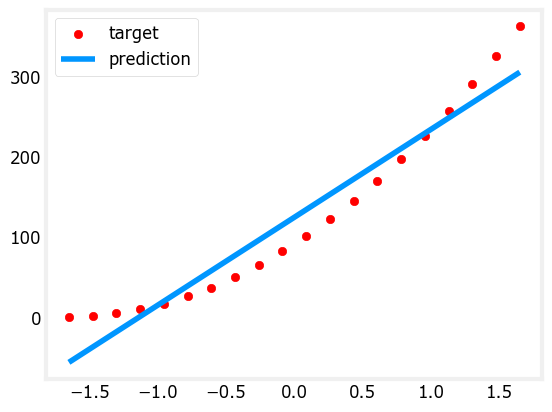

In [204]:


plt.scatter(X_norm[:,0],y,label="target",color="red")
plt.plot(X_norm[:,0],predict(X_norm,w_final,b_final),label="prediction")
    
plt.legend()
plt.show()    

Linear regression doesnot work with qudaratic target y